# 7章 ベイズ最適化：連続値の解空間に挑む

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('seaborn-whitegrid')

${x}' = (1,2)^\top$ に対するガウスカーネルの可視化

In [2]:
N = 100
center = np.array([1, 2])
x1 = np.linspace(center[0] - 4, center[0] + 4, N)
x2 = np.linspace(center[1] - 4, center[1] + 4, N)

X1, X2 = np.meshgrid(x1, x2)
X = np.c_[np.ravel(X1), np.ravel(X2)]

Y_plot = np.exp(-0.5 * np.linalg.norm(X - center, ord=2, axis=-1)**2)
Y_plot = Y_plot.reshape(X1.shape)

fig = plt.figure(figsize=(7, 3))

ax = fig.add_subplot(121, projection='3d', adjustable='box')

ax.plot_surface(X1, X2, Y_plot, alpha=0.3, rstride=2,cstride=2, edgecolors='w', linewidth=0.5)
ax.contour(X1, X2, Y_plot, zdir='z', offset=0)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$p$')

ax = fig.add_subplot(122, adjustable='box', aspect=1)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.contour(X1, X2, Y_plot)
ax.quiver(0, 0, center[0], center[1], color='black', angles='xy', scale_units='xy', scale=1)
ax.text(-1, -0.5, r'$(%d,%d)^\top$'%(center[0], center[1]), color='black')

fig.tight_layout()

${x}' = (1,2)^\top$ に対する恒等カーネルの可視化

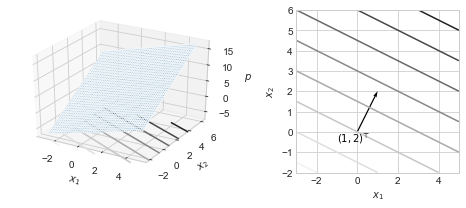

In [3]:
Y_plot = X[:, 0] * center[0] + X[:, 1] * center[1]
Y_plot = Y_plot.reshape(X1.shape)

fig = plt.figure(figsize=(7, 3))

ax = fig.add_subplot(121, projection='3d', adjustable='box')

ax.plot_surface(X1, X2, Y_plot, alpha=0.3, rstride=2,cstride=2, edgecolors='w', linewidth=0.5)
ax.contour(X1, X2, Y_plot, zdir='z', offset=-10)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.set_zlabel(r'$p$')

ax = fig.add_subplot(122, adjustable='box', aspect=1)
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.contour(X1, X2, Y_plot)
ax.quiver(0, 0, center[0], center[1], color='black', angles='xy', scale_units='xy', scale=1)
ax.text(-1, -0.5, r'$(%d,%d)^\top$'%(center[0], center[1]), color='black')

fig.tight_layout()

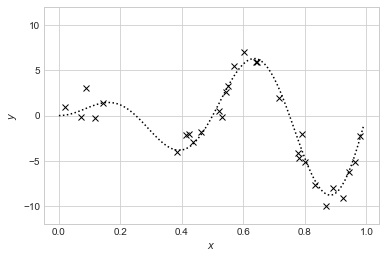

In [4]:
# 人工データセットの可視化
np.random.seed(0)
X_star = np.arange(0, 1, 0.01)
n_points = 30
f = lambda x: 10 * x * np.sin(4 * np.pi * x)
X = np.sort(np.random.random(size=n_points))
r = f(X) + np.random.normal(0, 1, size=n_points)
plt.ylim(-12, 12)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.plot(X_star, f(X_star), color='black', linestyle='dotted')
plt.plot(X, r, 'x', color='black')
plt.show()

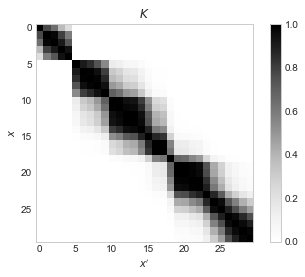

In [5]:
# カーネル行列Kの可視化
def gaussian_kernel(x1, x2, gamma=100):
  return np.exp(-gamma * (x1 - x2)**2)

K = np.zeros((len(X), len(X)))
for i, xi in enumerate(X):
    for j, xj in enumerate(X):
        K[i, j] = gaussian_kernel(xi, xj)

plt.xlabel(r'$x^{\prime}$')
plt.ylabel(r'$x$')
plt.title(r'$K$')
plt.imshow(K)
plt.colorbar()
plt.grid(None)
plt.show()

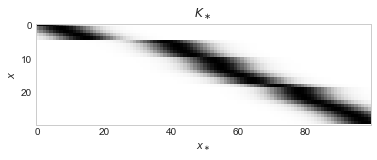

In [6]:
# カーネル行列K∗の可視化
K_star = np.zeros((len(X), len(X_star)))
for i, xi in enumerate(X):
    for j, xj_star in enumerate(X_star):
        K_star[i, j] = gaussian_kernel(xi, xj_star)

plt.xlabel(r'$x_\ast$')
plt.ylabel(r'$x$')
plt.title(r'$K_\ast$')
plt.imshow(K_star)
plt.grid(None)
plt.show()

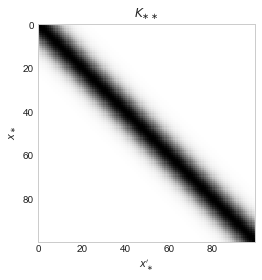

In [7]:
# カーネル行列K∗∗の可視化
K_starstar = np.zeros((len(X_star), len(X_star)))
for i, xi_star in enumerate(X_star):
    for j, xj_star in enumerate(X_star):
        K_starstar[i, j] = gaussian_kernel(xi_star, xj_star)

plt.xlabel(r'$x_\ast^{\prime}$')
plt.ylabel(r'$x_\ast$')
plt.title(r'$K_{\ast\ast}$')
plt.imshow(K_starstar)
plt.grid(None)
plt.show()

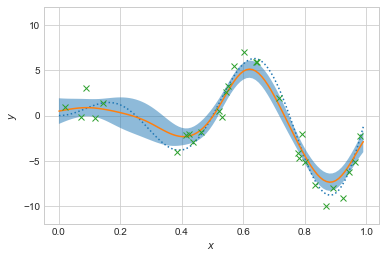

In [8]:
# 人工データセットに対するガウス過程回帰の結果
s = 1
A = np.linalg.inv(K + s * np.eye(K.shape[0]))
mu = np.dot(np.dot(K_star.T, A), r)
sigma = K_starstar - np.dot(np.dot(K_star.T, A), K_star)

plt.ylim(-12, 12)
plt.plot(X_star, f(X_star), linestyle='dotted')
plt.fill_between(X_star, mu - 2 * np.sqrt(np.diag(sigma)), mu + 2 * np.sqrt(np.diag(sigma)), alpha=0.5)
plt.plot(X_star, mu)
plt.plot(X, r, 'x')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

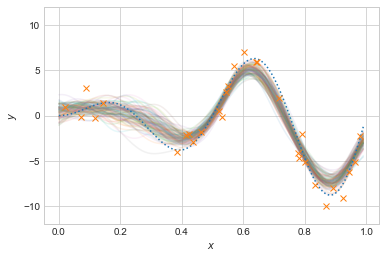

In [9]:
# 回帰曲線のサンプリング
plt.ylim(-12, 12)
for _ in range(100):
    plt.plot(X_star, np.random.multivariate_normal(mu, sigma), alpha=0.1)

plt.plot(X_star, f(X_star), linestyle='dotted')
plt.plot(X, r, 'x')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

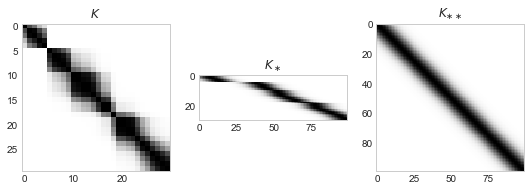

In [10]:
# 高速化の工夫を施した後に得られたカーネル行列
gamma = 100
X = np.expand_dims(X, 0)
X_star = np.expand_dims(X_star, 0)
Q = np.dot(X.T, X)
Q_star = np.dot(X.T, X_star)
Q_starstar = np.dot(X_star.T, X_star)

K = np.exp(-gamma * (np.tile(np.diag(Q), (X.shape[1], 1)).T - 2 * Q + np.tile(np.diag(Q), (X.shape[1], 1))))
K_star = np.exp(-gamma * (np.tile(np.diag(Q), (X_star.shape[1], 1)).T - 2 * Q_star + np.tile(np.diag(Q_starstar), (X.shape[1], 1))))
K_starstar = np.exp(-gamma * (np.tile(np.diag(Q_starstar), (X_star.shape[1], 1)).T - 2 * Q_starstar
    + np.tile(np.diag(Q_starstar), (X_star.shape[1], 1))))

plt.figure(figsize=(9, 3))
plt.subplot(1, 3, 1)
plt.title(r'$K$')
plt.imshow(K)
plt.grid(None)

plt.subplot(1, 3, 2)
plt.title(r'$K_\ast$')
plt.imshow(K_star)
plt.grid(None)

plt.subplot(1, 3, 3)
plt.title(r'$K_{\ast\ast}$')
plt.imshow(K_starstar)
plt.grid(None)
plt.show()

In [11]:
# 解空間の可視化
import colorsys

N = 30
X_im = np.zeros((N, N, 2))
rs = []
xs = []
for i in range(N):
    for j in range(N):
        X_im[i, j, 0] = i / N  # Hue
        X_im[i, j, 1] = j / N  # Lightness

hl_to_rgb = lambda x: colorsys.hls_to_rgb(x[0], x[1], 1)
X_rgb = np.apply_along_axis(hl_to_rgb, -1, X_im)

plt.imshow(X_rgb)
plt.grid(None)
plt.xlabel('Lightness')
plt.ylabel('Hue')
plt.show()

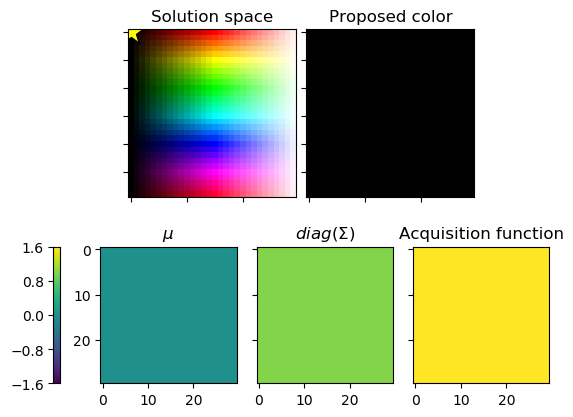

In [12]:
# GP-UCBアルゴリズム
X_star = X_im.reshape((N * N, 2)).T

class GPUCBAgent:
    def __init__(self):
        self.xs = []
        self.rs = []
        self.gamma = 10
        self.s = 0.5
        self.alpha = 2
        self.Q_starstar = X_star.T.dot(X_star)
        self.K_starstar = np.exp(-self.gamma * (np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1)).T
            - 2 * self.Q_starstar + np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1))))
        self.mu = np.zeros(self.K_starstar.shape[0])
        self.sigma = self.K_starstar
    
    def get_arm(self):
        ucb = self.mu + self.alpha * np.diag(self.sigma)
        return X_star[:, np.argmax(ucb)], ucb
    
    def sample(self, x, r):
        self.xs.append(x)
        self.rs.append(r)
        X = np.array(self.xs).T
        
        Q = X.T.dot(X)
        Q_star = X.T.dot(X_star)
        K = np.exp(-self.gamma * (np.tile(np.diag(Q), (X.shape[1], 1)).T - 2 * Q + np.tile(np.diag(Q), (X.shape[1], 1))))
        K_star = np.exp(-self.gamma * (np.tile(np.diag(Q), (X_star.shape[1], 1)).T
            - 2 * Q_star + np.tile(np.diag(self.Q_starstar), (X.shape[1], 1))))
        A = np.linalg.inv(self.s + np.identity(K.shape[0]) + K)
        self.mu = K_star.T.dot(A).dot(self.rs)
        self.sigma = self.K_starstar - K_star.T.dot(A).dot(K_star)
        
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

from mpl_toolkits.axes_grid1 import ImageGrid
def visualize(agent, x, f):
    vmax = 1.6
    vmin = -1.6
    contour_linewidth = 0.6
    contour_fontsize = 6
    contour_levels = np.linspace(-2, 2, 17)
    fig = plt.figure()
    grid = ImageGrid(fig, 211, nrows_ncols=(1, 2), axes_pad=0.1)
    grid[0].imshow(X_rgb)
    cs = grid[0].contour(f.reshape(N, N), levels=contour_levels, colors='white', linewidths=contour_linewidth)
    grid[0].clabel(cs, inline=1, fontsize=contour_fontsize)
    grid[0].plot(x[1] * N, x[0] * N, '*', markersize=20, color='yellow', markeredgecolor='black')
    grid[0].set_title('Solution space')
    grid[0].set_xticklabels([])
    grid[0].set_yticklabels([])
    grid[1].imshow(np.tile(hl_to_rgb(x), (N, N, 1)))
    grid[1].set_title('Proposed color')
    grid[1].set_xticklabels([])
    grid[1].set_yticklabels([])
    grid = ImageGrid(fig, 212, nrows_ncols=(1, 3), axes_pad=0.2, share_all=True, label_mode='L', cbar_location='left', cbar_mode='single')
    im = grid[0].imshow(agent.mu.reshape(N, N), vmin=vmin, vmax=vmax)
    cs = grid[0].contour(agent.mu.reshape(N, N), levels=contour_levels, colors='white', linewidths=contour_linewidth)
    grid[0].clabel(cs, inline=1, fontsize=contour_fontsize)
    grid[0].set_title(r'$\mu$')
    grid.cbar_axes[0].colorbar(im)
    grid[1].imshow(np.diag(agent.sigma).reshape(N, N), vmin=vmin, vmax=vmax)
    cs = grid[1].contour(np.diag(agent.sigma).reshape(N, N), levels=contour_levels, colors='white', linewidths=contour_linewidth)
    grid[1].set_title(r'$diag(\Sigma)$')
    grid[1].clabel(cs, inline=1, fontsize=contour_fontsize)
    grid[2].imshow(f.reshape(N, N), vmin=vmin, vmax=vmax)
    cs = grid[2].contour(f.reshape(N, N), levels=contour_levels, colors='black', linewidths=contour_linewidth)
    grid[2].clabel(cs, inline=1, fontsize=contour_fontsize)
    grid[2].set_title('Acquisition function')
    plt.show()

# GP-UCBアルゴリズムによって最初に提示された色および内部の状態
agent = GPUCBAgent()
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

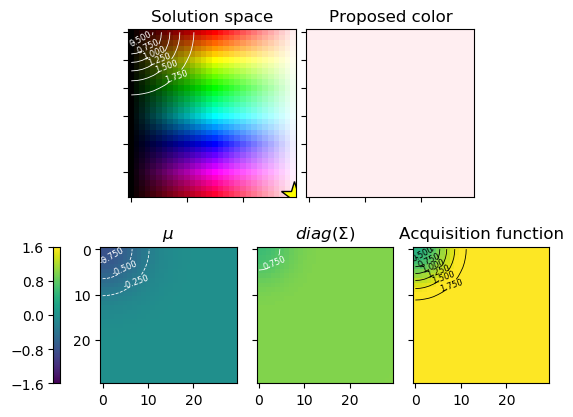

In [13]:
# GP-UCBアルゴリズムによって2番目に提示された色および内部の状態
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

In [14]:
# GP-UCBアルゴリズムによって5番目に提示された色および内部の状態
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

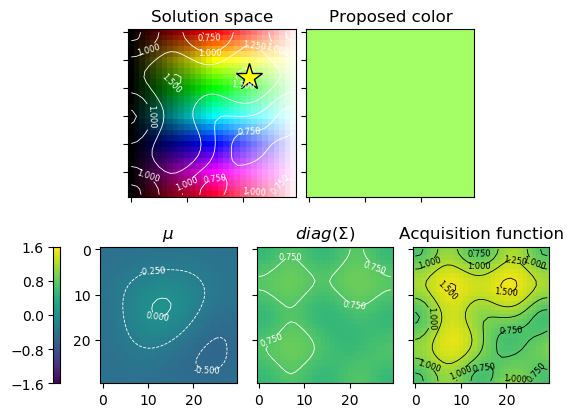

In [15]:
# GP-UCBアルゴリズムによって11番目に提示された色および内部の状態
agent.sample(x, -1)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

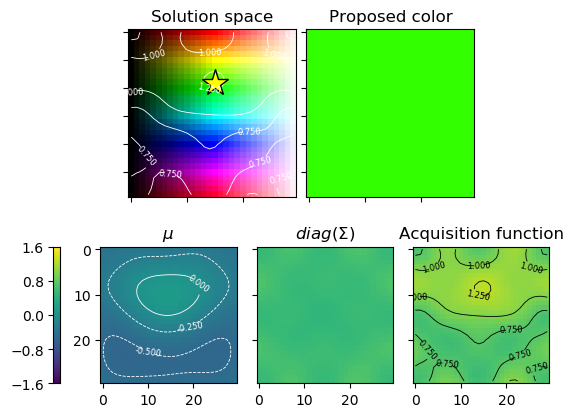

In [16]:
# GP-UCBアルゴリズムによって14番目に提示された色および内部の状態
agent.sample(x, -1)
x, ucb = agent.get_arm()
agent.sample(x, -1)
x, ucb = agent.get_arm()
agent.sample(x, -2)
x, ucb = agent.get_arm()
visualize(agent, x, ucb)

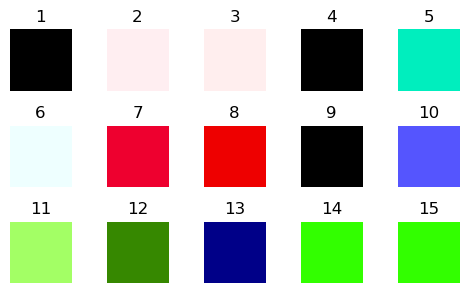

In [17]:
agent.sample(x, 2)
x, ucb = agent.get_arm()
agent.sample(x, 2)

# GP-UCBアルゴリズムが提示した色の履歴
plt.figure(figsize=(5, len(agent.xs) // 5 + 1))
for i, x in enumerate(agent.xs):
    plt.subplot(len(agent.xs) // 5 + 1, 5, i + 1)
    plt.title(i + 1)
    plt.imshow(np.tile(hl_to_rgb(x), (1, 1, 1)))
    plt.axis('off')
plt.tight_layout()
plt.show()

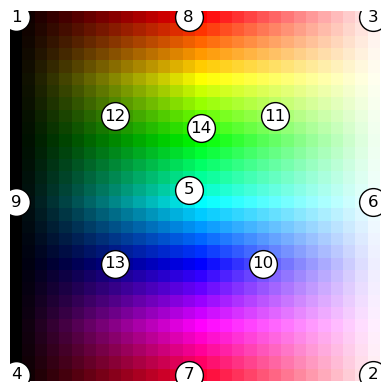

In [18]:
# GP-UCBアルゴリズムが提示した解の位置の履歴
plt.imshow(X_rgb)
for i, x in enumerate(agent.xs[:-1]):
    plt.plot(x[1] * N, x[0] * N, 'o', markersize=20, color='white', markeredgecolor='black')
    plt.text(x[1] * N, x[0] * N, str(i + 1), color='black', fontsize=12, verticalalignment='center', horizontalalignment='center')
plt.axis('off')
plt.show()

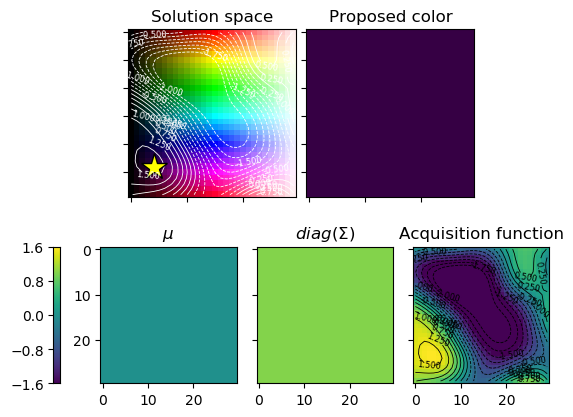

In [28]:
# GP-TSアルゴリズム
class GPTSAgent:
    def __init__(self):
        self.xs = []
        self.rs = []
        self.gamma = 10
        self.s = 0.5
        self.Q_starstar = X_star.T.dot(X_star)
        self.K_starstar = np.exp(-self.gamma * (np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1)).T
            - 2 * self.Q_starstar + np.tile(np.diag(self.Q_starstar), (X_star.shape[1], 1))))
        self.mu = np.zeros(self.K_starstar.shape[0])
        self.sigma = self.K_starstar
    
    def get_arm(self):
        f = np.random.multivariate_normal(self.mu, self.sigma)
        return X_star[:, np.argmax(f)], f
    
    def sample(self, x, r):
        self.xs.append(x)
        self.rs.append(r)
        X = np.array(self.xs).T
        
        Q = X.T.dot(X)
        Q_star = X.T.dot(X_star)
        K = np.exp(-self.gamma * (np.tile(np.diag(Q), (X.shape[1], 1)).T - 2 * Q + np.tile(np.diag(Q), (X.shape[1], 1))))
        K_star = np.exp(-self.gamma * (np.tile(np.diag(Q), (X_star.shape[1], 1)).T
            - 2 * Q_star + np.tile(np.diag(self.Q_starstar), (X.shape[1], 1))))
        A = np.linalg.inv(self.s + np.identity(K.shape[0]) + K)
        self.mu = K_star.T.dot(A).dot(self.rs)
        self.sigma = self.K_starstar - K_star.T.dot(A).dot(K_star)

# GP-TSアルゴリズムによって最初に提示された色および内部の状態
np.random.seed(0)
agent = GPTSAgent()
x, f = agent.get_arm()
visualize(agent, x, f)

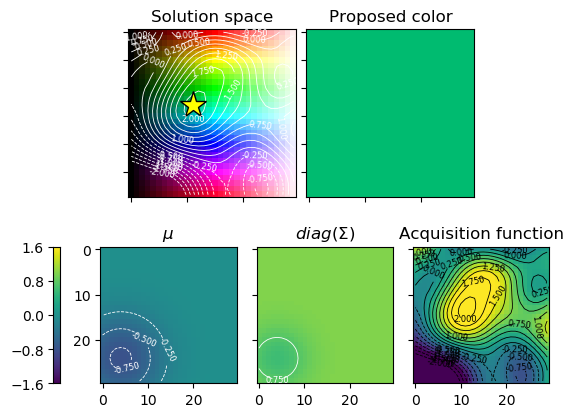

In [29]:
# GP-TSアルゴリズムによって2番目に提示された色および内部の状態
agent.sample(x, -2)
x, f = agent.get_arm()
visualize(agent, x, f)

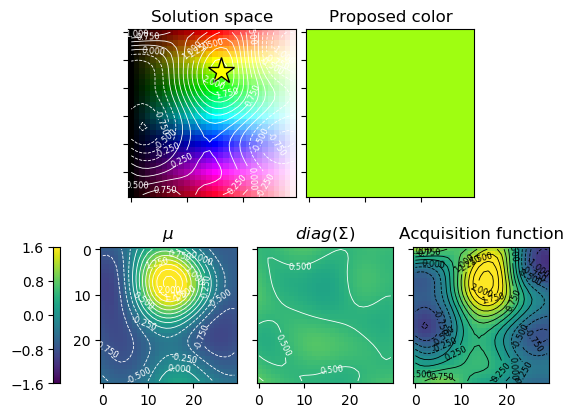

In [30]:
# GP-TSアルゴリズムによって25番目に提示された色および内部の状態
agent.sample(x, -1)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, -2)
x, f = agent.get_arm()
agent.sample(x, 2)
x, f = agent.get_arm()
agent.sample(x, 2)
x, f = agent.get_arm()
agent.sample(x, 1)
x, f = agent.get_arm()
agent.sample(x, 1)
x, f = agent.get_arm()
agent.sample(x, 2)
x, f = agent.get_arm()
agent.sample(x, 2)
x, f = agent.get_arm()
agent.sample(x, 1)
x, f = agent.get_arm()
agent.sample(x, 1)
x, f = agent.get_arm()
visualize(agent, x, f)

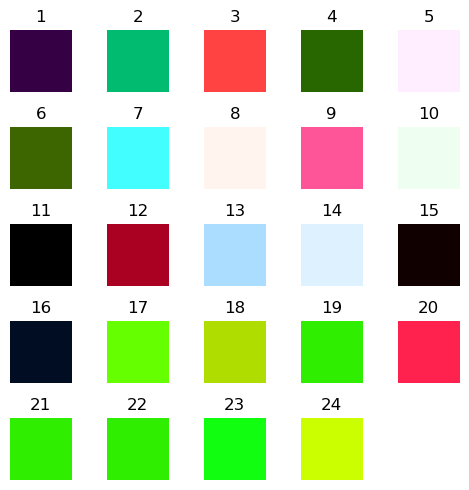

In [31]:
# GP-TSアルゴリズムが提示した色の履歴
plt.figure(figsize=(5, len(agent.xs) // 5 + 1))
for i, x in enumerate(agent.xs):
    plt.subplot(len(agent.xs) // 5 + 1, 5, i + 1)
    plt.title(i + 1)
    plt.imshow(np.tile(hl_to_rgb(x), (1, 1, 1)))
    plt.axis('off')

plt.tight_layout()
plt.show()

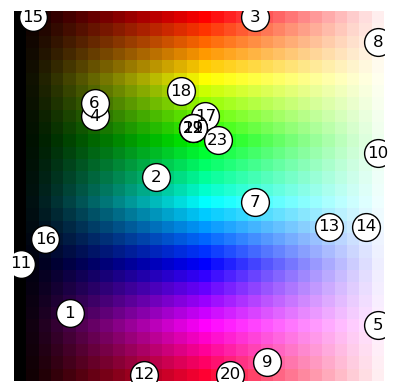

In [33]:
# GP-TSアルゴリズムが提示した解の位置の履歴
plt.imshow(X_rgb)
for i, x in enumerate(agent.xs[:-1]):
    plt.plot(x[1] * N, x[0] * N, 'o', markersize=20, color='white', markeredgecolor='black')
    plt.text(x[1] * N, x[0] * N, str(i + 1), color='black', fontsize=12, verticalalignment='center', horizontalalignment='center')
plt.axis('off')
plt.show()